In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing

# 读取房价数据，有其他参数可以指定，例如return_X_y，as_frame
# 具体用法请查阅API文档，这里使用默认参数
housing = fetch_california_housing()

# 输出数据集的描述
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# 数据集其实封装在sklearn库中的Bunch类中
# Bunch类类似于python字典类型

# Bunch类有data和target属性，data是每个样本的特征值，target是对应的房价
type(housing)

sklearn.utils.Bunch

In [4]:
type(housing.data)

numpy.ndarray

In [5]:
# 共有八个特征，20640个样本
housing.data.shape

(20640, 8)

In [6]:
# 每个样本对应的房价
housing.target.shape

(20640,)

In [7]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [8]:
# feature_names属性保存了每个特征的特征名
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## 树模型参数:

1. criterion，指定选择划分属性的依据，由于这里是回归决策树，因此使用方差作为划分依据

2. splitter  best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

3. max_features  None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

4. max_depth  数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

5. min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再选择最优特征来进行划分，如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

6. min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值

7. min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

8. max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制具体的值可以通过交叉验证得到。

9. class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

10. min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点

11. n_estimators:要建立树的个数

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# 创建一个决策树对象，决策树对象有很多可调的参数
# 最常用的参数是max_depth和min_samples_split

# max_depth限制了树的高度，如果max_depth=2，表示只选择2个特征划分样本
# min_samples_split表示需要划分的叶子结点的最少样本数
# 如果min_samples_split=10表示样本数小于10的叶子结点不再进行划分，否则继续划分

# 更多的参数请参考API文档，这里仅指定一个max_depth
dtr = DecisionTreeRegressor(max_depth = 2)

# 训练模型，只取后面两列，注意fit方法对y参数要求的形状是一维数组
dtr.fit(housing.data[:, [6, 7]], housing.target)

DecisionTreeRegressor(max_depth=2)

In [10]:
# 这些参数的用法请参考API文档，第一个参数是需要导出的决策树对象
# feature_names指定特征名，如果不指定特征名系统使用feature_0, feature_1等代替
# filled表示使用颜色填充结点，如果喜欢黑白则设置为False
# rounded表示是否将结点显示为圆角矩形，默认为False
# impurity表示是否显示结点的不纯度，默认为True
dot_data = export_graphviz(dtr, feature_names = housing.feature_names[6:8], 
        filled = False, impurity = True, rounded = False)

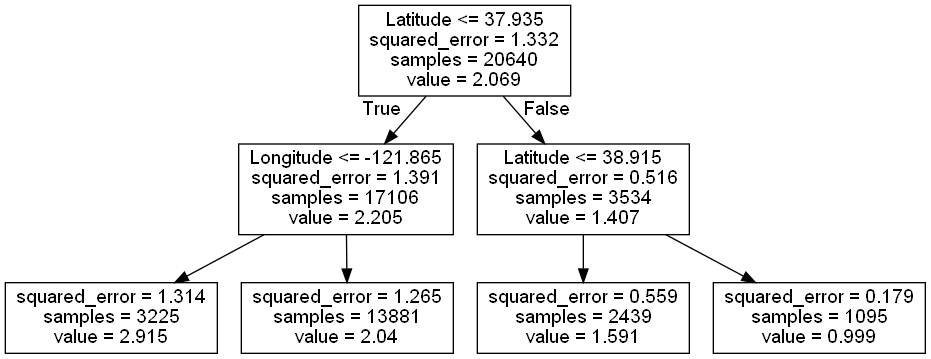

In [11]:
import pydotplus

# 将图像保存到本地
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("dtr_white_background.png")

# 如果想在notebook中展示出图片，需要导入Image类
from IPython.display import Image
Image(graph.create_png())

In [12]:
from sklearn.model_selection import train_test_split

# test_size是测试集比例
data_train, data_test, target_train, target_test = \
    train_test_split(housing.data, housing.target, test_size = 0.1, random_state=42)

# 使用默认参数创建一个决策树对象
dtr = DecisionTreeRegressor(random_state=42)

dtr.fit(data_train, target_train)

# 输出决定系数(coefficient of determination)，决定系数越接近1.0模型越好
dtr.score(data_test, target_test)

0.63569049103791

In [13]:
from sklearn.ensemble import RandomForestRegressor

# 拿随机森林做个测试
rfr = RandomForestRegressor(random_state=42)

rfr.fit(data_train, target_train)

rfr.score(data_test, target_test)

0.8087175262588111

In [14]:
from sklearn.model_selection import GridSearchCV

tree_param_grid = {'min_samples_split': [5, 10, 15],
                   'n_estimators': [50, 100, 150]}

# 第一个参数是需要调参的对象
# param_grid参数指定需要搜索的参数，参数类型为字典
# 其中字典的key是参数名，value是参数的所有取值(一般为列表)
# cv参数指定交叉验证的折数，默认使用5折交叉验证

# n_jobs表示使用多少个核进行运算，默认只用一个核，如果设置为-1，表示使用所有核
# verbose表示调参时输出的信息，一般设置为2

# 创建GridSearchCV对象
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_param_grid, 
                    cv=5, verbose=2, n_jobs=-1)

# 根据传入的调参对象，多次执行fit()方法，找到最优的参数
# 注意因为需要执行交叉验证，所以只使用训练集的数据
grid.fit(data_train, target_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [15]:
# 输出最优的参数
grid.best_params_

{'min_samples_split': 5, 'n_estimators': 100}

In [16]:
grid.best_score_

0.8070822714872783

In [17]:
# 带有最优参数的模型
grid.best_estimator_

RandomForestRegressor(min_samples_split=5)

In [18]:
# 根据最优的参数，创建随机森林对象
rfr = RandomForestRegressor(min_samples_split=5, n_estimators=150, random_state=42)

rfr.fit(data_train, target_train)

rfr.score(data_test, target_test)

0.8102639791475468

In [19]:
# 输出各个特征的重要程度，同时指定索引
pd.Series(rfr.feature_importances_, index = housing.feature_names)

MedInc        0.530286
HouseAge      0.053116
AveRooms      0.044352
AveBedrms     0.028110
Population    0.028986
AveOccup      0.137487
Latitude      0.088871
Longitude     0.088793
dtype: float64